**DOMAIN: Medical**
* CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
* DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
* PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.


* **STEPS AND TASK**

1.  **Data Understanding:**

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

B. Print Shape and columns of all the 3 DataFrames.
C. Compare Column names of all the 3 DataFrames and clearly write observations.

D. Print DataTypes of all the 3 DataFrames.

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.
2. **Data Preparation and Exploration:**
A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.
For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

B. Combine all the 3 DataFrames to form a single DataFrame
Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame

D. Print Feature-wise percentage of Null values.

E. Check 5-point summary of the new DataFrame.
3. **Data Analysis:**
A. Visualize a heatmap to understand correlation between all features
B. Share insights on correlation.
A. Features having stronger correlation with correlation value.
B. Features having weaker correlation with correlation value.
C. Visualize a pairplot with 3 classes distinguished by colors and share insights.
D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.
E. Visualize a boxplot to check distribution of the features and share insights.
4. **Model Building:**
A. Split data into X and Y.
B. Split data into train and test with 80:20 proportion.
C. Train a Supervised Learning Classification base model using KNN classifier.
D. Print all the possible performance metrics for both train and test data.
5. **Performance Improvement:**
A. Experiment with various parameters to improve performance of the base model.
(Optional: Experiment with various Hyperparameters - Research required)
B. Clearly showcase improvement in performance achieved.
For Example:
A. Accuracy: +15% improvement
B. Precision: +10% improvement.
C. Clearly state which parameters contributed most to improve model performance.

In [ ]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix,silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
normalData = pd.read_csv('/content/sample_data/Part1+-+Normal.csv')
normalData.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [ ]:
typeSData = pd.read_csv('/content/sample_data/Part1+-+Type_S.csv')
typeSData.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [ ]:
typeHData = pd.read_csv('/content/sample_data/Part1+-+Type_H.csv')
typeHData.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [ ]:
normalData.shape

(100, 7)

In [ ]:
typeSData.shape

(150, 7)

In [ ]:
typeHData.shape


(60, 7)

In [ ]:
combinedData = pd.concat([normalData, typeSData, typeHData], ignore_index=True)

In [ ]:
combinedData.shape

(310, 7)

**Extracting and Comparing the columns**

In [ ]:
normal_ColumnData = normalData.columns
typeS_ColumnData = typeSData.columns
typeH_ColumnData = typeHData.columns
print("Normal data Set columns:", normal_ColumnData)
print("TypeS data set Columns:",typeS_ColumnData)
print("TypeH data set Columns:",typeH_ColumnData)


Normal data Set columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
TypeS data set Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
TypeH data set Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [ ]:
#Comparison
medCommonColumn = set(normal_ColumnData)& set(typeS_ColumnData)& set(typeH_ColumnData)
uniqueNormalColumn = set(normal_ColumnData)-medCommonColumn
uniqueTypeSData = set(typeS_ColumnData)-medCommonColumn
uniqueTypeHData = set(typeH_ColumnData)-medCommonColumn
print("Common Columns in all 3 data sets:",medCommonColumn)
print("Common column based on normal_Dataset:",uniqueNormalColumn)
print("Common column based on TypeS_Dataset:",uniqueTypeSData)
print("Common column based on TypeH_Dataset:",uniqueTypeHData)
##unique Data in 'Class' column
all_classes = pd.concat([normalData['Class'], typeSData['Class'], typeHData['Class']]).unique()
print("Unique classes across all datasets:", all_classes)


Common Columns in all 3 data sets: {'P_incidence', 'P_tilt', 'S_Degree', 'P_radius', 'Class', 'S_slope', 'L_angle'}
Common column based on normal_Dataset: set()
Common column based on TypeS_Dataset: set()
Common column based on TypeH_Dataset: set()
Unique classes across all datasets: ['Normal' 'Nrmal' 'Type_S' 'tp_s' 'Type_H' 'type_h']


**Inference:**

Based on the observations we find that there are no unique column specific to the data set

In [ ]:
#printing datatypes of each dataset
print('Normal Datatype:',normalData.dtypes)
print('TypeS Datatype:',typeSData.dtypes)
print('TypeH Datatype:',typeHData.dtypes)

Normal Datatype: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
TypeS Datatype: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
TypeH Datatype: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


## Task 2
#Data Preparation and Exploration:
 A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’
B. Combine all the 3 DataFrames to form a single DataFrame Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame

D. Print Feature-wise percentage of Null values.

E. Check 5-point summary of the new DataFrame.

In [ ]:
normalData['Class'] = 'normal'
typeSData['Class'] = 'type_s'
typeHData['Class']= 'type_h'

In [ ]:
combinedData = pd.concat([normalData, typeSData, typeHData], ignore_index=True)
combinedData.shape

(310, 7)

In [ ]:
combinedData.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [ ]:
combinedData.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
58,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,normal
297,41.352504,16.577364,30.706191,24.775141,113.266675,-4.497958,type_h
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,normal
49,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,normal
19,43.436451,10.095743,36.032224,33.340707,137.439694,-3.114451,normal


In [ ]:
combinedData.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,type_h
306,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,type_h
307,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,type_h
308,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,type_h
309,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,type_h


In [ ]:
normalData.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [ ]:
#Percentage of missing values
##function to calculate percentage of null values feature-wise
def calculateNullPercent(df):
  return(df.isnull().sum()/len(df))*100
nullNormalPercentage = calculateNullPercent(normalData)
nullTypeSPercent = calculateNullPercent(typeSData)
nullTypeHPercent = calculateNullPercent(typeHData)
nullValues = pd.concat([nullNormalPercentage,nullTypeSPercent,nullTypeHPercent],axis=1)
nullValues.columns = ['Normal','TypeS','TypeH']
nullValues


,Normal,TypeS,TypeH
P_incidence,0.0,0.0,0.0
P_tilt,0.0,0.0,0.0
L_angle,0.0,0.0,0.0
S_slope,0.0,0.0,0.0
P_radius,0.0,0.0,0.0
S_Degree,0.0,0.0,0.0
Class,0.0,0.0,0.0


In [ ]:
#Calculation of 5 point Summary
combinedData.describe().loc[['min', '25%', '50%', '75%', 'max']]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#**Data Analysis:**
A. Visualize a heatmap to understand correlation between all features

 1. Share insights on correlation.

 2. Features having stronger correlation with correlation value.

 3. Features having weaker correlation with correlation value.


B. Visualize a pairplot with 3 classes distinguished by colors and share insights.


C. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

D. Visualize a boxplot to check distribution of the features and share insights.

Original DataFrame:     Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  0.437587
1  0.891773  0.963663  0.383442  0.791725  0.528895  0.568045  0.925597
2  0.071036  0.087129  0.020218  0.832620  0.778157  0.870012  0.978618
3  0.799159  0.461479  0.780529  0.118274  0.639921  0.143353  0.944669
4  0.521848  0.414662  0.264556  0.774234  0.456150  0.568434  0.018790
5  0.617635  0.612096  0.616934  0.943748  0.681820  0.359508  0.437032
6  0.697631  0.060225  0.666767  0.670638  0.210383  0.128926  0.315428
7  0.363711  0.570197  0.438602  0.988374  0.102045  0.208877  0.161310
8  0.653108  0.253292  0.466311  0.244426  0.158970  0.110375  0.656330
9  0.138183  0.196582  0.368725  0.820993  0.097101  0.837945  0.096098
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894
1  0.891773  0.963663  0.383442  0.791725  0.528895  0.568045
2 

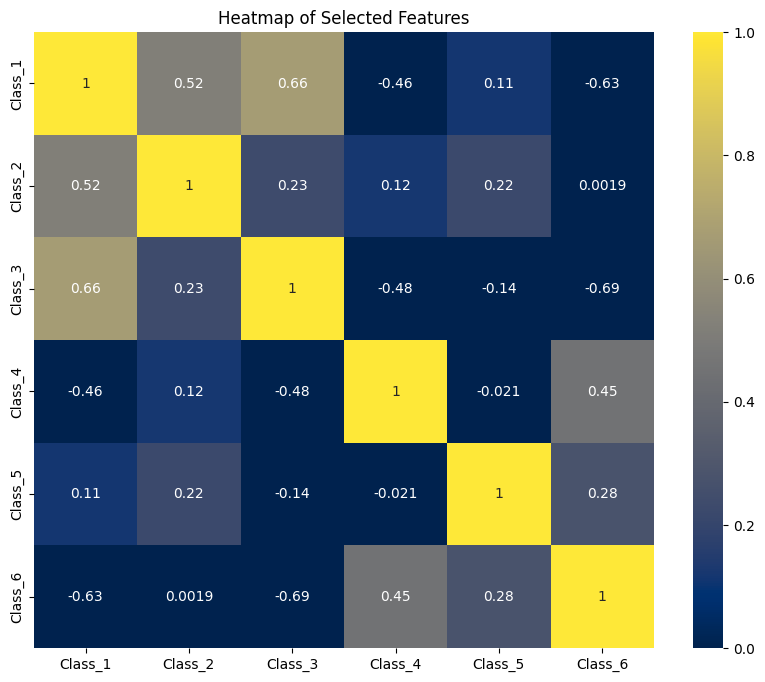

In [ ]:
#TODO: Heatmap
np.random.seed(0)
data = np.random.rand(10,7)
columnsMedInvestigation = [f'Class_{i}' for i in range(1,8)]
medSamplesIndex=[f'Class_{i}' for i in range(1,11)]#Creation of Samples
medDf =pd.DataFrame(data,columns=columnsMedInvestigation)

print("Original DataFrame:",medDf)

#only selected columns that is excliding 'Class' column
selectedMedClass = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6'] # Update column names
filteredMedDf = medDf[selectedMedClass]
print(filteredMedDf)
medMatrix=filteredMedDf.corr()
print(medMatrix)
#heat map creation
plt.figure(figsize=(10,8))
sns.heatmap(medMatrix,annot=True,cmap='cividis',vmin=0,vmax=1 )
plt.title('Heatmap of Selected Features')
plt.show()

#**Insights on Correlation**
##Strong Positive correlations



From the Heatmap we can observe the following:
*   Class_1(P_incidence) and Class_3(L_angle) are highly correlated having the value of 0.66
*    Class_1(P_incidence) and Class_2(P_tilt) ranks the second among them as the correlation between them is 0.52

#Moderate Positive Correlations
*   Class_4(S_slope) and Class_6(S_Degree) has the correlation of about 0.45
*   Class_6(S_Degree) and Class_5(P_radius) has the correlation of about 0.28
*  Class_5(P_radius)and Class_2(P_tilt) has the correlation of about 0.22




#Weak Positive Correlations

*    Class_2(P_tilt) and Class_6(S_Degree) has weakest positive Correlation as the correlation value among them is 0.0019
*   Class_2(P_tilt) and Class_4(S_slope) has weaker Correlation as the correlation value among them is 0.11
*   Class_1(P_incidence) and Class_5(P_radius) has weak Correlation as the correlation value among them is 0.11



#Negative Correlations


*   Class_3(L_angle) and class_6(S_Degree) has the weakest correlation of -0.69
















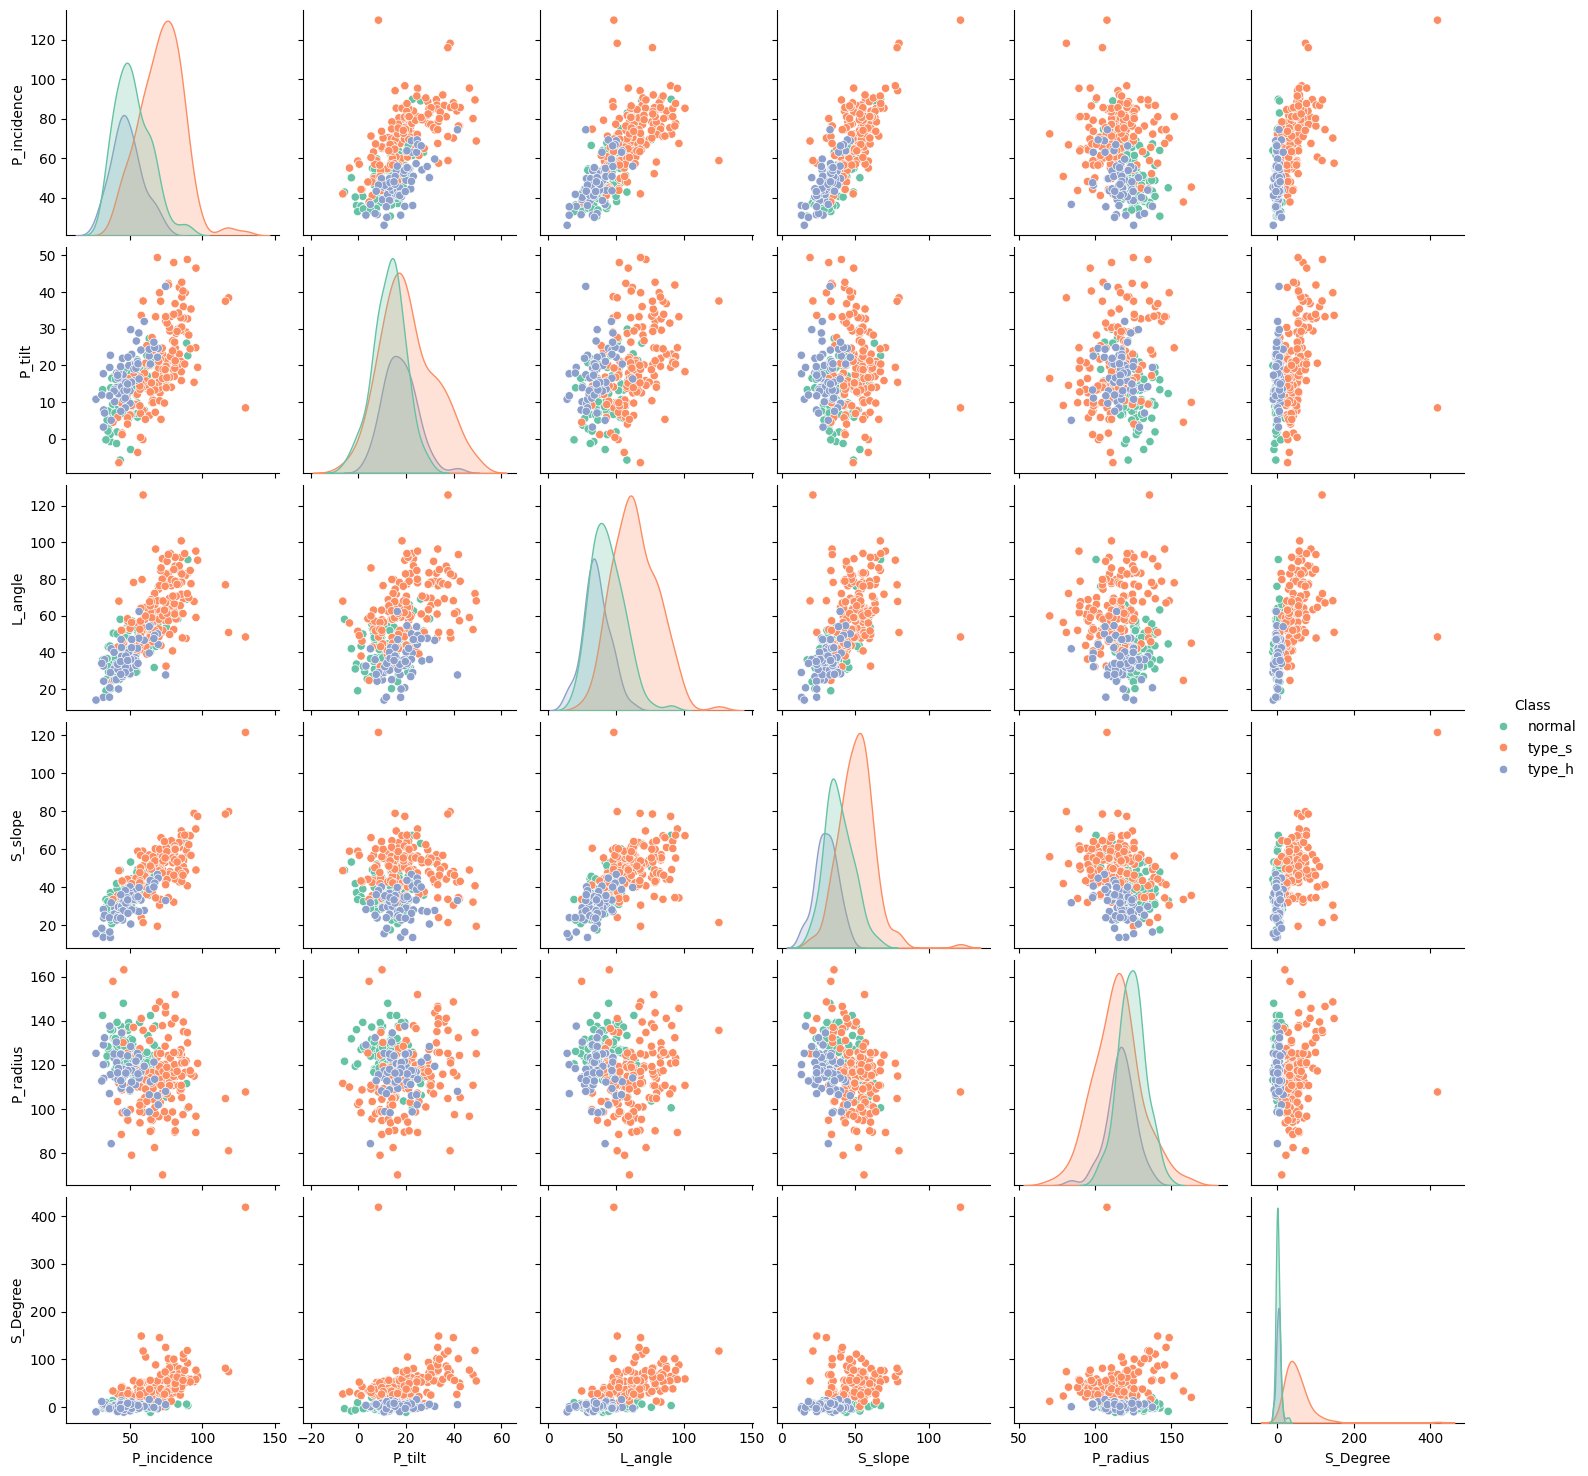

In [ ]:
#Pairplot
sns.pairplot(combinedData,hue='Class',palette='Set2')
plt.show()


#Inference

**Correlations:**

P_incidence and S_slope: There is a positive correlation, as observed in the previous scatter plot.
P_incidence and P_tilt: There is a positive correlation.
P_incidence and L_angle: There is a positive correlation.
P_incidence and P_radius: There is a positive correlation.
P_tilt and L_angle: There is a positive correlation.
P_tilt and S_slope: There is a positive correlation.
L_angle and S_slope: There is a positive correlation.
L_angle and P_radius: There is a positive correlation.
S_slope and P_radius: There is a positive correlation.

**Class Differences:**

The "normal" class (orange) tends to have higher values for "P_incidence," "P_tilt," "L_angle," "S_slope," "P_radius," and "S_Degree."
The "type_S" class (green) and "type_H" class (blue) overlap in many variables but show distinct clustering patterns in some plots, especially with "S_Degree" being low for these classes.

**Distribution:**

P_incidence, P_tilt, L_angle, S_slope, and P_radius show a roughly normal distribution for each class, with the "normal" class having a higher range.
S_Degree shows a skewed distribution, with the "normal" class having a higher range compared to "type_S" and "type_H."
Outliers:

There are several outliers in the plots, particularly for "P_incidence" and "S_slope."

**Clusters:**

The "normal" class forms distinct clusters in most scatter plots, separating it from "type_S" and "type_H."

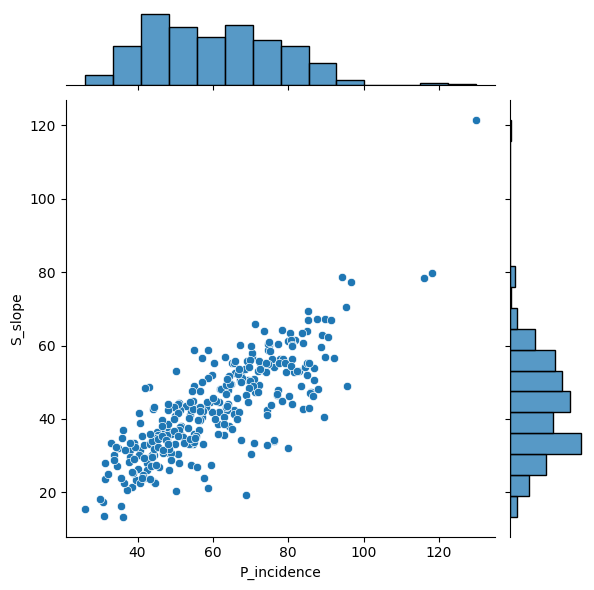

In [ ]:
#Joint Plot
sns.jointplot(x='P_incidence',y='S_slope',data = combinedData)
plt.show()

#Inference
**Positive Correlation: **
There is a clear positive correlation between "P_incidence" and "S_slope," indicating that as the "P_incidence" increases, "S_slope" also tends to increase.

**Outlier:** There is a noticeable outlier in the upper right corner of the scatter plot, where "P_incidence" is around 120 and "S_slope" is around 120. This data point deviates significantly from the other observations.

**Distribution of Variables:**

**P_incidence:** The histogram at the top shows the distribution of "P_incidence." The distribution appears to be roughly normal, with most values centered around 50 to 90.

**S_slope:** The histogram on the right shows the distribution of "S_slope." This distribution also appears to be roughly normal, with most values centered around 20 to 60.
Data Density: The scatter plot indicates a higher density of data points in the central region, suggesting that most observations cluster around the middle range of both variables.

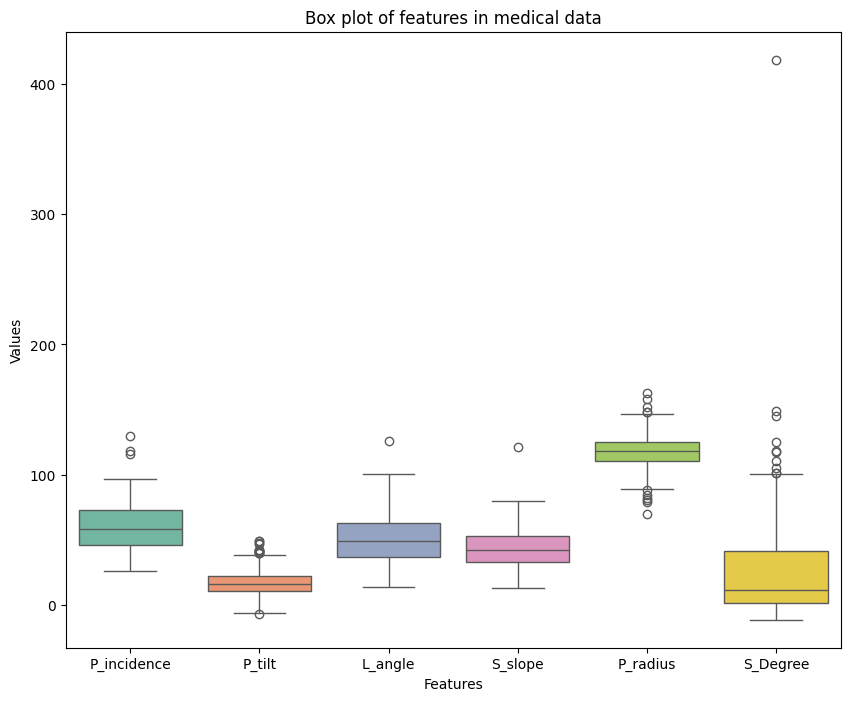

In [ ]:
#boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data=combinedData,palette='Set2')
plt.title("Box plot of features in medical data")
plt,plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

#Inference

**P_incidence:**

Median: Around 45
Interquartile Range (IQR): Approximately 30 to 60
Outliers: Several outliers above 100, with a few beyond 150
Range: Values range from around 10 to just above 100

**P_tilt:**

Median: Around 10
IQR: Approximately 5 to 20
Outliers: A few outliers above 40
Range: Values range from around 0 to just above 40

**L_angle:**

Median: Around 40
IQR: Approximately 30 to 55
Outliers: Some outliers above 70, with one beyond 100
Range: Values range from around 10 to 80

**S_slope:**

Median: Around 35
IQR: Approximately 25 to 45
Outliers: A few outliers above 60
Range: Values range from around 10 to just above 60

**P_radius:**

Median: Around 130
IQR: Approximately 125 to 135
Outliers: Several outliers above 140, with one extreme outlier beyond 400
Range: Values range from around 110 to just above 150

**S_Degree:**

Median: Around 0
IQR: Approximately -2.5 to 5
Outliers: Several outliers below -5 and above 10, with one beyond 50
Range: Values range from around -5 to 10

#Univariate Analysis

In [ ]:
masterMedData = combinedData[:]
masterMedData['Class'].value_counts()

Class
type_s    150
normal    100
type_h     60
Name: count, dtype: int64

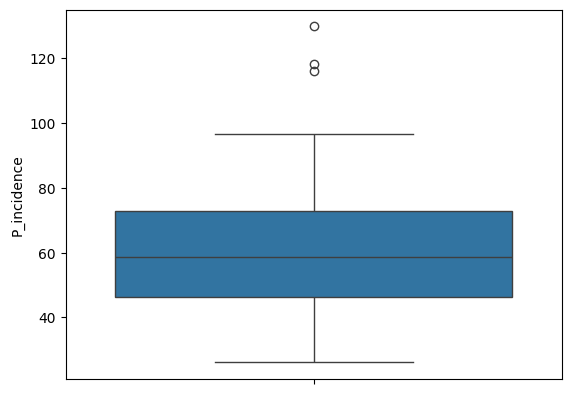

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: P_incidence, dtype: float64


In [ ]:
sns.boxplot(y=masterMedData['P_incidence'],)
plt.ylabel('P_incidence')
plt.show()
p_incidence_Desc = masterMedData['P_incidence'].describe()
print(p_incidence_Desc)

#Inference

The P_incidence value varies from 26.15 to 129.83 with the mean of 60.5

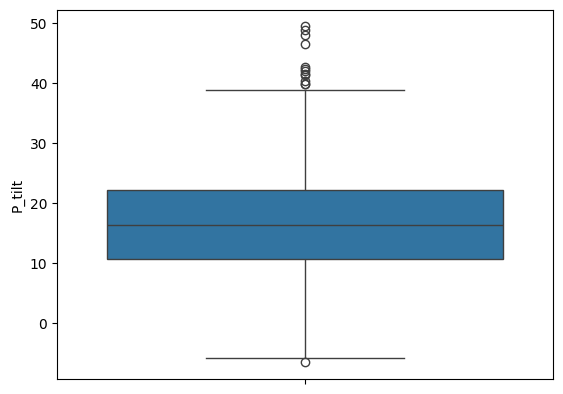

count    310.000000
mean      17.542822
std       10.008330
min       -6.554948
25%       10.667069
50%       16.357689
75%       22.120395
max       49.431864
Name: P_tilt, dtype: float64


In [ ]:
sns.boxplot(y=masterMedData['P_tilt'],)
plt.ylabel('P_tilt')
plt.show()
p_incidence_Desc = masterMedData['P_tilt'].describe()
print(p_incidence_Desc)

#Inference

The p_tilt value ranges from -6.55 to 49.43 and has a mean of 17.54

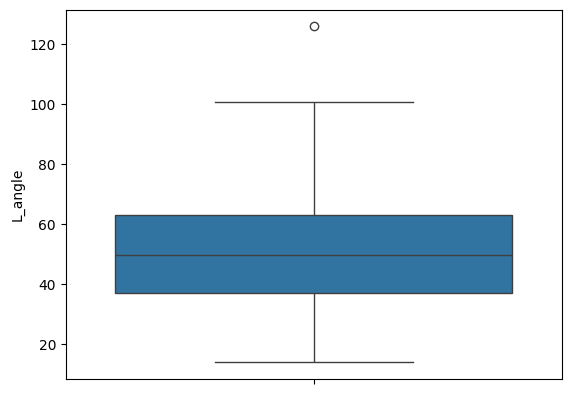

count    310.000000
mean      51.930930
std       18.554064
min       14.000000
25%       37.000000
50%       49.562398
75%       63.000000
max      125.742385
Name: L_angle, dtype: float64


In [ ]:
sns.boxplot(y=masterMedData['L_angle'],)
plt.ylabel('L_angle')
plt.show()
p_incidence_Desc = masterMedData['L_angle'].describe()
print(p_incidence_Desc)

#Inference
The L_angle value ranges from 14 to 125.74 and has a mean of 51.93



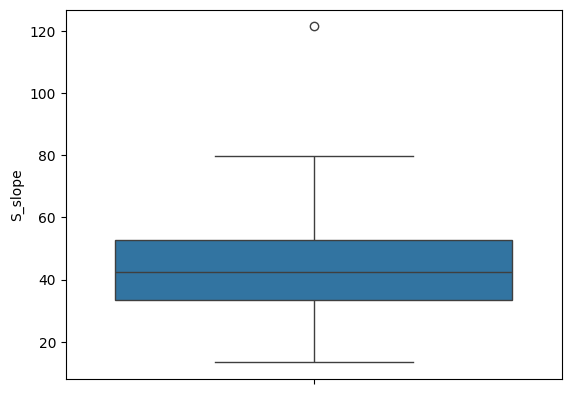

count    310.000000
mean      42.953831
std       13.423102
min       13.366931
25%       33.347122
50%       42.404912
75%       52.695888
max      121.429566
Name: S_slope, dtype: float64


In [ ]:
sns.boxplot(y=masterMedData['S_slope'],)
plt.ylabel('S_slope')
plt.show()
p_incidence_Desc = masterMedData['S_slope'].describe()
print(p_incidence_Desc)



#Inference

The S_slope ranges from 13.37 to 121.429 with the mean value of 42.95

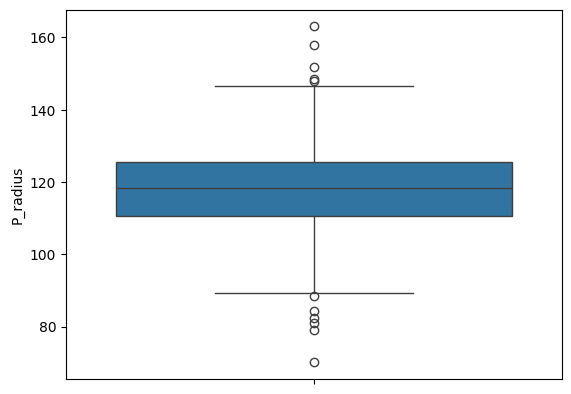

count    310.000000
mean     117.920655
std       13.317377
min       70.082575
25%      110.709196
50%      118.268178
75%      125.467674
max      163.071041
Name: P_radius, dtype: float64


In [ ]:
#	P_radius
sns.boxplot(y=masterMedData['P_radius'],)
plt.ylabel('P_radius')
plt.show()
p_incidence_Desc = masterMedData['P_radius'].describe()
print(p_incidence_Desc)



#Inference
The p_radius ranges from 70.08 to 163.07 with the mean of 117.92

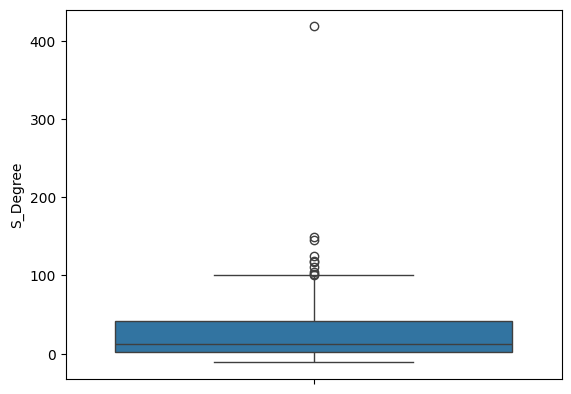

count    310.000000
mean      26.296694
std       37.559027
min      -11.058179
25%        1.603727
50%       11.767934
75%       41.287352
max      418.543082
Name: S_Degree, dtype: float64


In [ ]:
#S_Degree
sns.boxplot(y=masterMedData['S_Degree'],)
plt.ylabel('S_Degree')
plt.show()
p_incidence_Desc = masterMedData['S_Degree'].describe()
print(p_incidence_Desc)

#Inference
The S_slope ranges from -11.06 to 418.54 and with the mean of 26.30

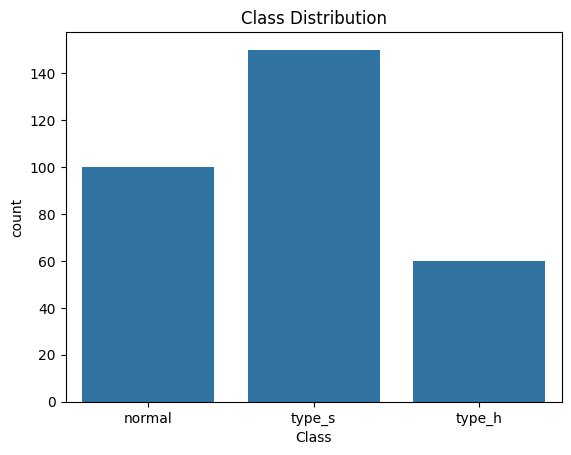

In [ ]:
sns.countplot(x='Class',data=masterMedData)
plt.title('Class Distribution')
plt.show()

#Inference
We could observe that most of the people are falling into the category of 'type_s' and 'type_h' is much lower than 'type_s'. This infers that there is much lesser amount of people falling into the category type_h than 'normal' and 'type_s' categories

#Task 4: Model Building:
A. Split data into X and Y.

B. Split data into train and test with 80:20 proportion.

C. Train a Supervised Learning Classification base model using KNN classifier.

D. Print all the possible performance metrics for both train and test data.

In [ ]:
X= combinedData.drop('Class', axis=1)
y =combinedData['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 #Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
medTrain_pred =knn.predict(X_train)
medTest_pred = knn.predict(X_test)

# Print performance metrics for training data
print("Training Metrics:")
print("Accuracy Score:", accuracy_score(y_train, medTrain_pred))
print("Classification Report:")
print(classification_report(y_train, medTrain_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, medTrain_pred))

# Print performance metrics for test data
print("\nTesting Metrics:")
print("Accuracy Score:", accuracy_score(y_test, medTest_pred))
print("Classification Report:")
print(classification_report(y_test, medTest_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, medTest_pred))

Training Metrics:
Accuracy Score: 0.8830645161290323
Classification Report:
              precision    recall  f1-score   support

      normal       0.80      0.85      0.82        78
      type_h       0.77      0.69      0.73        49
      type_s       0.98      0.98      0.98       121

    accuracy                           0.88       248
   macro avg       0.85      0.84      0.84       248
weighted avg       0.88      0.88      0.88       248

Confusion Matrix:
[[ 66  10   2]
 [ 15  34   0]
 [  2   0 119]]

Testing Metrics:
Accuracy Score: 0.7903225806451613
Classification Report:
              precision    recall  f1-score   support

      normal       0.69      0.82      0.75        22
      type_h       0.64      0.64      0.64        11
      type_s       0.96      0.83      0.89        29

    accuracy                           0.79        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.81      0.79      0.79        62

Confusion Matrix:
[[18

#Task 5:Performance Improvement:
 A. Experiment with various parameters to improve performance of the base model. (Optional: Experiment with various Hyperparameters - Research required)

 B. Clearly showcase improvement in performance achieved. For Example: A. Accuracy: +15% improvement B. Precision: +10% improvement.

 C. Clearly state which parameters contributed most to improve model performance.

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)

# Evaluate performance on test set with best parameters
best_knn = grid_search.best_estimator_
test_pred = best_knn.predict(X_test)

from sklearn.metrics import precision_score, recall_score

# Calculate and print improvement metrics
accuracy_improvement = (accuracy_score(y_test, test_pred) - accuracy_score(y_train,medTrain_pred )) * 100

# Calculate precision, recall and F1-score using 'macro' averaging for multiclass
precision_improvement = (precision_score(y_test, test_pred, average='macro') - precision_score(y_train, medTrain_pred, average='macro')) * 100
recall_improvement = (recall_score(y_test, test_pred, average='macro') - recall_score(y_train, medTrain_pred, average='macro')) * 100

print(f"Performance Improvements Achieved:")
print(f"A. Accuracy: +{accuracy_improvement:.2f}% improvement")
print(f"B. Precision: +{precision_improvement:.2f}% improvement")
print(f"C. Recall: +{recall_improvement:.2f}% improvement")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Score (Accuracy): 0.8546938775510204
Performance Improvements Achieved:
A. Accuracy: +-7.66% improvement
B. Precision: +-7.78% improvement
C. Recall: +-6.90% improvement


#SVM

In [ ]:
combinedData['Class'] = combinedData['Class'].astype('category').cat.codes
X= combinedData.drop('Class', axis=1)
y =combinedData['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the SVM model
svm_model = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Extract precision and recall for each class
precision = report_df['precision'] * 100
recall = report_df['recall'] * 100

# Print accuracy
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Print precision and recall for each class
print("\nPrecision and Recall (%):")
for label in report_df.index:
    if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
        print(f"Class '{label}' - Precision: {precision[label]:.2f}%, Recall: {recall[label]:.2f}%")

# Print classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 87.10%

Precision and Recall (%):
Class '0' - Precision: 85.71%, Recall: 81.82%
Class '1' - Precision: 73.33%, Recall: 100.00%
Class '2' - Precision: 96.15%, Recall: 86.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.73      1.00      0.85        11
           2       0.96      0.86      0.91        29

    accuracy                           0.87        62
   macro avg       0.85      0.89      0.86        62
weighted avg       0.88      0.87      0.87        62



#Kmeans

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combinedData)

# Step 3: Apply K-Means clustering
# Assuming we want to cluster the data into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


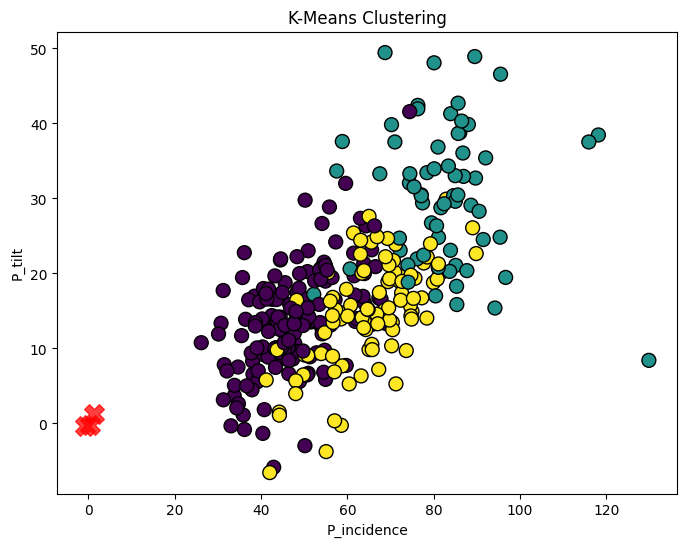

In [ ]:
# Step 3: Apply K-Means clustering
# Assuming we want to cluster the data into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Step 4: Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 5: Add the cluster labels to the original DataFrame
combinedData['Cluster'] = labels

# Step 6: Visualize the results
# For simplicity, we'll plot only two features, 'P_incidence' and 'P_tilt'
plt.figure(figsize=(8, 6))
plt.scatter(combinedData['P_incidence'], combinedData['P_tilt'], c=combinedData['Cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.xlabel('P_incidence')
plt.ylabel('P_tilt')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# Calculate Silhouette Score
sil_score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {sil_score}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, labels)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.3115920549028874
Davies-Bouldin Index: 1.29637227047907


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

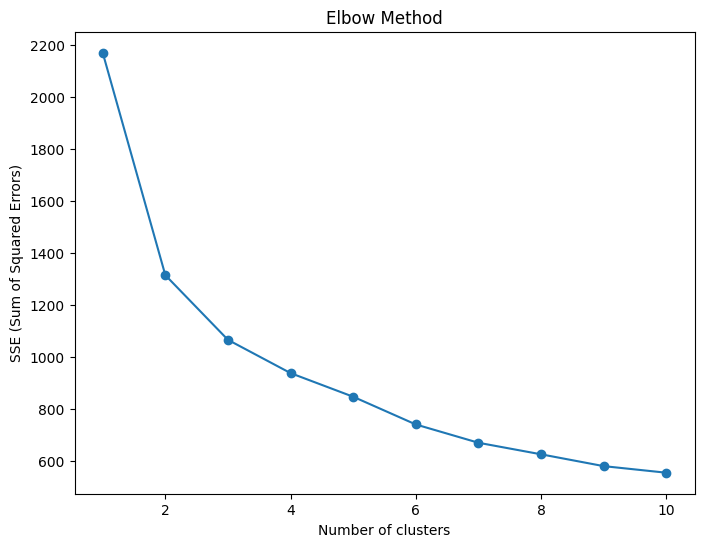

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

#Random Forest


In [ ]:
X= combinedData.drop('Class', axis=1)
y =combinedData['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)


In [ ]:
X= combinedData.drop('Class', axis=1)
y =combinedData['Class']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Get feature names (assuming your DataFrame has column names as features)
feature_names = X.columns

# Determine the unique class names from your target variable
class_names_list = y.unique().astype(str).tolist()  # Convert to string for graphviz

# Export the tree to DOT format
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names_list,  # Use the derived class names
                           filled=True, rounded=True, special_characters=True)

# Create a Graphviz source object
graph = graphviz.Source(dot_data)

# Render the tree and save as PNG
output_file = graph.render("decision_tree", format="png", cleanup=True)  # Save as PNG and cleanup DOT file
print(f"Decision tree saved as {output_file}")

Decision tree saved as decision_tree.png


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Extract precision and recall for each class
precision = report_df['precision'] * 100
recall = report_df['recall'] * 100

# Print accuracy
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Print precision and recall for each class
print("\nPrecision and Recall (%):")
for label in report_df.index:
    if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
        print(f"Class '{label}' - Precision: {precision[label]:.2f}%, Recall: {recall[label]:.2f}%")

# Print classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 83.87%

Precision and Recall (%):
Class '0' - Precision: 76.92%, Recall: 90.91%
Class '1' - Precision: 70.00%, Recall: 63.64%
Class '2' - Precision: 96.15%, Recall: 86.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.70      0.64      0.67        11
           2       0.96      0.86      0.91        29

    accuracy                           0.84        62
   macro avg       0.81      0.80      0.80        62
weighted avg       0.85      0.84      0.84        62

